---
#### CS 260 Database and Data Visualizsation - Final Project - SP24
- Ifrahim Ansari
- Jonathan Nelson
---

# The Registered Population of Electric Vehicles in Washington State

In [129]:
# imports go here
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
#HINT: what 3 did we use in the group by HW?  Delete this comment when the 3 imports have been added.

### By: Johnathan Nelson, Ifrahim Ansari


**LINK: https://github.com/IfrahimA/final_project/blob/main/electric_vehicle_population.csv**

---

## 1. Introduction

For this project, our group conducted an examination of the electric vehicle population within the state of Washington, analyzing with a focus on the types and distribution of electric vehicles.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://catalog.data.gov/dataset/electric-vehicle-population-data

The data was obtained from the Washington State Department of Licensing (DOL) and represents currently registered Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). The dataset likely includes information collected through vehicle registration records maintained by the DOL, in the earliest around 1996, to present day. The sample includes approx. 177,865 registered vehicles in the state of Washington, and also includes vehicles apart of other states, that are currently registered under Washington. The specific timeframe for when the data was obtained would depend on when the vehicle was registered, accessed, and then displayed on the dataset. The dataset provides no additional information in regards to timeframe when the data obtained.






In [143]:
#In this cell, we load the data.
try:
    #load the csv data from github
    ev_csv = pd.read_csv("https://raw.githubusercontent.com/IfrahimA/final_project/main/electric_vehicle_population.csv")
    county_csv = pd.read_csv("https://raw.githubusercontent.com/IfrahimA/final_project/main/ev_population_county.csv")

    #Connect to a database - change "example.db" to a database that makes sense for your data.
    conn = sql.connect('ev.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    ev_csv.to_sql('ev', conn, index = False)
    county_csv.to_sql('ev_county', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

### 2.1 Variables Explained


* **vin** – identification for each electric vehicle. each vin number is unique and corresponds to a select vehicles when they are manufacturered.

* **County** – country where the car is located

* **city** – city location of where the car is located

* **state** – state location where the car is located

* **make** – name of the manufacturer that makes the car

* **model** – product name to identify the subset of cars of each manufacturer

* **electric_vehicle_type** – divided into a select type of electric vehicles
  * Battery Electric Vehicle (BEV)
  * Plug-in Hybrid Electric Vehicle (PHEV)

* **clean_alternative_fuel** – considers if the vehicle is eligible for alternative fuel options

* **electric_utility** – displays an authority that distributes electrical energy for the specified vehicle

* **postal_code** – zip code of the location where the vehicle is registered

* **model_year** – year that the car was manufactured

* **electric_range** – refers to the distance (miles) a vehicle can travel solely on electric power before needing to recharge its battery or switch to another power source.

* **base_msrp** – displays the Manufacturer’s Suggested Retail Price (MSRP)

* **longitude** – displays the longitude coordinates of the vehicles and their location

* **latitude** – displays the latitude coordinates of the vehicles and their location

Variables from the EV by county Table.

* **date** - displays the date when registered

* **state** - displays the date when registered

* **vehicle_primary_use** - displays the date when registered

* **battery_ev** - the use of an vehicle, whether acting as a truck or a passenger vehicle or neither

* **hybrid_ev** - 

* **ev_total_population** - displays the date when registered

* **non_ev__total_pop** - displays the date when registered

* **total_vehicles** - displays the date when registered

* **percent_ev** - displays the date when registered

In [144]:
#Show the rows of the table.
sql_statement = """SELECT *
                   FROM ev
                """
ev_data = pd.read_sql_query(sql_statement, conn)
ev_data

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,-122.308390,47.610365,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,-122.179458,47.802589,PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,-122.348480,47.632405,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,-122.036460,47.534065,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,-122.557170,47.733415,PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,-122.183805,47.180620,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,-123.105305,47.211085,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,-119.849387,47.233993,PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,-122.004510,47.312185,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [150]:
#Show the rows of the table.
sql_statement = """SELECT *
                   FROM ev_county
                """
ev_data_county = pd.read_sql_query(sql_statement, conn)
ev_data_county

,date,county,state,vehicle_primary_use,battery_ev,hybrid_ev,ev_total_population,non_ev__total_pop,total_vehicles,percent_ev
0,April 30 2022,Wahkiakum,WA,Truck,0.0,0.0,0.0,1815.0,1815.0,0.00
1,May 31 2017,Adams,WA,Truck,0.0,0.0,0.0,5079.0,5079.0,0.00
2,October 31 2019,Collin,TX,Passenger,2.0,1.0,3.0,142.0,145.0,2.07
3,January 31 2024,Franklin,WA,Truck,10.0,0.0,10.0,20616.0,20626.0,0.05
4,February 28 2018,Grays Harbor,WA,Truck,0.0,0.0,0.0,20109.0,20109.0,0.00
...,...,...,...,...,...,...,...,...,...,...
21203,February 28 2023,Adams,WA,Passenger,21.0,11.0,32.0,13009.0,13041.0,0.25
21204,June 30 2020,Douglas,NE,Passenger,0.0,1.0,1.0,55.0,56.0,1.79
21205,February 29 2020,Chelan,WA,Passenger,216.0,78.0,294.0,54600.0,54894.0,0.54
21206,July 31 2021,Chesapeake,VA,Passenger,0.0,3.0,3.0,411.0,414.0,0.72


# **3. Analysis**

### Q1: What are the percentage of EV's that exist within the 5 major counties?

In [ ]:
sql_statement = """
                CREATE VIEW ev_join
                AS
                    SELECT county, AVG(electric_range) AS avg_electric_range, AVG(base_msrp) AS avg_base_msrp
                    FROM ev
                    WHERE county IS NOT NULL AND electric_range != 0 AND base_msrp != 0
                    GROUP BY county
                """
results = pd.read_sql_query(sql_statement, conn)
results

In [96]:
sql_statement = """
                SELECT
                    CASE
                        WHEN x.county = "Pierce" THEN "Pierce"
                        WHEN x.county = "Spokane" THEN "Spokane"
                        WHEN x.county = "Thurston" THEN "King"
                        WHEN x.county = "Kitsap" THEN "Kitsap"
                        WHEN x.county = "Whatcom" THEN "Whatcom"
                        ELSE "Other"
                    END top5, (COUNT(*) * 1.0 / (SELECT COUNT(*) FROM ev)) * 100 AS perc_ev
                FROM ev x
                WHERE state = "WA"
                GROUP BY top5
                """
total_vehicle_pop = pd.read_sql_query(sql_statement, conn)
total_vehicle_pop

,top5,perc_ev
0,King,3.613957
1,Kitsap,3.283371
2,Other,80.165968
3,Pierce,7.748530
4,Spokane,2.578345
5,Whatcom,2.391126


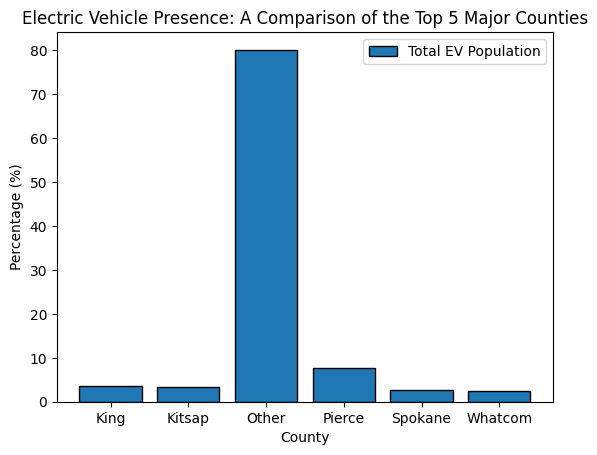

In [97]:
plt.bar(total_vehicle_pop["top5"], total_vehicle_pop["perc_ev"], ec="black", label="Total EV Population")
plt.title("Electric Vehicle Presence: A Comparison of the Top 5 Major Counties")
plt.ylabel("Percentage (%)")
plt.xlabel("County")
plt.yticks()
plt.legend();

The data clearly shows that most electric vehicles (EVs) are not concentrated in the top 5 major counties. This goes against the common belief that EVs are only available in big cities. Surprisingly, the majority of EVs are actually found outside these major counties, indicating that they're suitable for all kinds of locations. This is likely because many EVs are versatile and can be used across different areas and needs.

### Q2: For EV's within the top 5 counties, how do they compare to none EV's?

In [117]:
sql_statement = """
                SELECT DISTINCT(date)
                FROM ev_county
                WHERE county = "King"
                """
results = pd.read_sql_query(sql_statement, conn)
results

,date
0,January 31 2022
1,November 30 2018
2,January 31 2024
3,January 31 2019
4,December 31 2019
...,...
82,February 28 2022
83,September 30 2022
84,March 31 2018
85,April 30 2017


In [ ]:
sql_statement = """
                SELECT * 
                FROM ev_county
                
                """
results = pd.read_sql_query(sql_statement, conn)
results